# Compute Pi

This notebook contains various methods of computing pi.

## Polygon Approximation

The idea is explained in detail in this vedio [Compute the value of pi](https://www.youtube.com/watch?v=dBoG4eRSWG8).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [11]:
def draw_circle_and_polygon(n_poly):
    # Figure setup
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.axis([-1.7, 1.7, -1.7, 1.7])
    
    # Draw circle
    unit_circle = plt.Circle((0, 0), 1, ec='b', fc='none')

    ax.add_artist(unit_circle)
    
    # Draw polygon
    degree = np.linspace(0, 2*np.pi, n_poly+1)
    x = np.cos(degree)
    y = np.sin(degree)
    plt.plot(x, y, c='r')
    
    # Draw lines to collect cicile point and polygon vertex
    for i in range(0, n_poly):
        plt.plot([0, x[i]], [0, y[i]], 'g--')

The idea is simple, we draw inscrible polygon in a unit circle, like this:

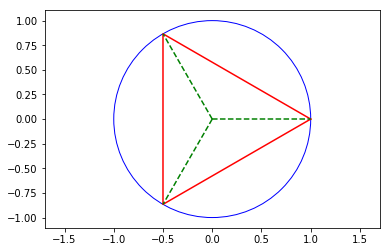

In [12]:
draw_circle_and_polygon(3)

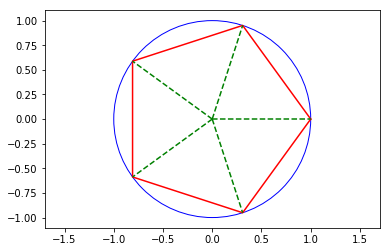

In [13]:
draw_circle_and_polygon(5)

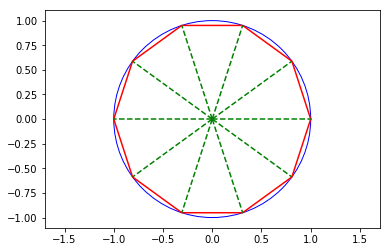

In [14]:
draw_circle_and_polygon(10)

The area of the unit circle is pi, we can use the polygon to appoximate the area of the circle.

Have you notice the gree dash line we added in these plots? We can compute the area of the polygon by add up all the triangle.

For one sigle triangle, notice it is isosceles triangle, with lateral of 1 and the top corner can be easily calculated, so we can ge the area by:

$$ Trangle_{area} = \frac{1}{2} \sin(\frac{2\pi}{N} )  $$

where __N__ is the number of lateral. 

Hence the area of polygon:

$$ Polygon_{area} = \frac{N}{2} \sin(\frac{2\pi}{N} )  $$

Let's see how this play out.

In [20]:
def compute_pi(n):
    return n/2 * np.sin(2*np.pi/n)

def error(n):
    return np.pi - compute_pi(n)

In [34]:
compute_pi(20)

3.0901699437494741

We can see that, when n is 20, it is close. If plot the error, we can see it drop quickly.

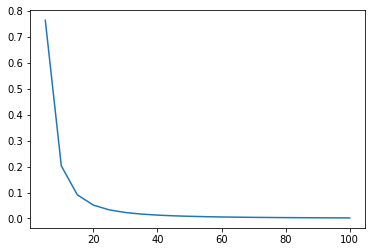

In [35]:
n = np.arange(5, 105, 5)
e = error(n)
plt.plot(n, e)

Awesome, we compute pi using polygon approximation!